In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)


In [4]:
from citipy import citipy


In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

636

In [6]:
import requests
from config import weather_api_key
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | havelock
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | aklavik
Processing Record 4 of Set 1 | dalvik
Processing Record 5 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | takoradi
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | taybad
Processing Record 13 of Set 1 | ribeira grande
Processing Record 14 of Set 1 | homer
Processing Record 15 of Set 1 | tingrela
City not found. Skipping...
Processing Record 16 of Set 1 | iqaluit
Processing Record 17 of Set 1 | guajara
Processing Record 18 of Set 1 | bucerias
Processing Record 19 of Set 1 | hermanus
Processing Record 20 of Set 1 | vila velha
Processing Record 21 of Set 1 | ulaangom
Processing Record 22 of Set 1 | y

Processing Record 39 of Set 4 | warrnambool
Processing Record 40 of Set 4 | kangaatsiaq
Processing Record 41 of Set 4 | yambio
Processing Record 42 of Set 4 | leirvik
Processing Record 43 of Set 4 | gamba
Processing Record 44 of Set 4 | honningsvag
Processing Record 45 of Set 4 | san vicente
Processing Record 46 of Set 4 | qasigiannguit
Processing Record 47 of Set 4 | djougou
Processing Record 48 of Set 4 | araouane
Processing Record 49 of Set 4 | unity
Processing Record 50 of Set 4 | houma
Processing Record 1 of Set 5 | bayji
Processing Record 2 of Set 5 | nanga eboko
Processing Record 3 of Set 5 | val
Processing Record 4 of Set 5 | tura
Processing Record 5 of Set 5 | tuktoyaktuk
Processing Record 6 of Set 5 | santa maria
Processing Record 7 of Set 5 | kapaa
Processing Record 8 of Set 5 | enshi
Processing Record 9 of Set 5 | qaqortoq
Processing Record 10 of Set 5 | abalak
Processing Record 11 of Set 5 | kupang
Processing Record 12 of Set 5 | umm kaddadah
Processing Record 13 of Set 5 

Processing Record 30 of Set 8 | manggar
Processing Record 31 of Set 8 | baikunthpur
Processing Record 32 of Set 8 | esperance
Processing Record 33 of Set 8 | haines junction
Processing Record 34 of Set 8 | lorengau
Processing Record 35 of Set 8 | grunberg
Processing Record 36 of Set 8 | fukue
Processing Record 37 of Set 8 | lircay
Processing Record 38 of Set 8 | fort nelson
Processing Record 39 of Set 8 | malanje
Processing Record 40 of Set 8 | siverskiy
Processing Record 41 of Set 8 | batagay-alyta
Processing Record 42 of Set 8 | uniao da victoria
City not found. Skipping...
Processing Record 43 of Set 8 | coihaique
Processing Record 44 of Set 8 | tome
Processing Record 45 of Set 8 | pasighat
Processing Record 46 of Set 8 | rosarito
Processing Record 47 of Set 8 | faya
Processing Record 48 of Set 8 | paso de los toros
Processing Record 49 of Set 8 | zharkent
Processing Record 50 of Set 8 | ust-omchug
Processing Record 1 of Set 9 | flin flon
Processing Record 2 of Set 9 | gorodishche
P

Processing Record 17 of Set 12 | manokwari
Processing Record 18 of Set 12 | tapaua
City not found. Skipping...
Processing Record 19 of Set 12 | tres arroyos
Processing Record 20 of Set 12 | sept-iles
Processing Record 21 of Set 12 | askarovo
Processing Record 22 of Set 12 | banyo
Processing Record 23 of Set 12 | meyungs
City not found. Skipping...
Processing Record 24 of Set 12 | kudahuvadhoo
Processing Record 25 of Set 12 | los llanos de aridane
Processing Record 26 of Set 12 | avesta
Processing Record 27 of Set 12 | huarmey
Processing Record 28 of Set 12 | stoyba
City not found. Skipping...
Processing Record 29 of Set 12 | saint paul
Processing Record 30 of Set 12 | sioux lookout
Processing Record 31 of Set 12 | salinopolis
Processing Record 32 of Set 12 | ye
City not found. Skipping...
Processing Record 33 of Set 12 | kungurtug
Processing Record 34 of Set 12 | mirnyy
Processing Record 35 of Set 12 | hirara
Processing Record 36 of Set 12 | kapoeta
Processing Record 37 of Set 12 | for

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Havelock,34.8791,-76.9013,39.92,80,0,7.09,US,2023-01-16 03:13:39
1,Mataura,-46.1927,168.8643,81.63,30,13,8.10,NZ,2023-01-16 03:13:39
2,Aklavik,68.2191,-135.0107,-17.99,98,100,3.36,CA,2023-01-16 03:13:40
3,Dalvik,65.9702,-18.5286,16.00,79,98,6.31,IS,2023-01-16 03:13:40
4,Barrow,71.2906,-156.7887,-18.38,76,100,13.80,US,2023-01-16 03:09:26
5,New Norfolk,-42.7826,147.0587,70.92,33,0,3.00,AU,2023-01-16 03:13:41
6,Vaini,-21.2000,-175.2000,82.45,77,40,11.45,TO,2023-01-16 03:13:42
7,Atuona,-9.8000,-139.0333,78.28,76,100,13.87,PF,2023-01-16 03:13:42
8,Takoradi,4.8845,-1.7554,77.92,85,20,4.72,GH,2023-01-16 03:13:43
9,Yellowknife,62.4560,-114.3525,-13.54,100,100,2.82,CA,2023-01-16 03:13:43


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Havelock,US,2023-01-16 03:13:39,34.8791,-76.9013,39.92,80,0,7.09
1,Mataura,NZ,2023-01-16 03:13:39,-46.1927,168.8643,81.63,30,13,8.10
2,Aklavik,CA,2023-01-16 03:13:40,68.2191,-135.0107,-17.99,98,100,3.36
3,Dalvik,IS,2023-01-16 03:13:40,65.9702,-18.5286,16.00,79,98,6.31
4,Barrow,US,2023-01-16 03:09:26,71.2906,-156.7887,-18.38,76,100,13.80
5,New Norfolk,AU,2023-01-16 03:13:41,-42.7826,147.0587,70.92,33,0,3.00
6,Vaini,TO,2023-01-16 03:13:42,-21.2000,-175.2000,82.45,77,40,11.45
7,Atuona,PF,2023-01-16 03:13:42,-9.8000,-139.0333,78.28,76,100,13.87
8,Takoradi,GH,2023-01-16 03:13:43,4.8845,-1.7554,77.92,85,20,4.72
9,Yellowknife,CA,2023-01-16 03:13:43,62.4560,-114.3525,-13.54,100,100,2.82


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

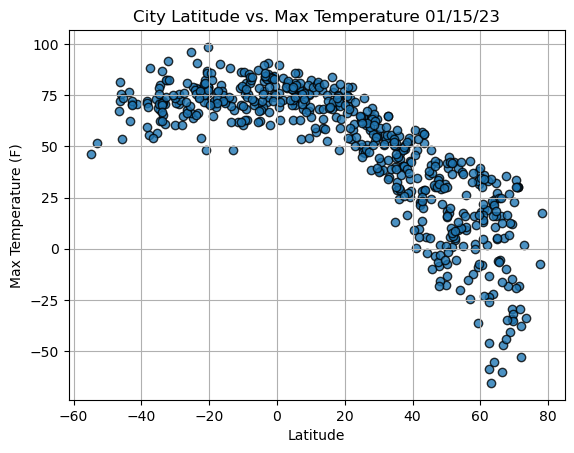

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

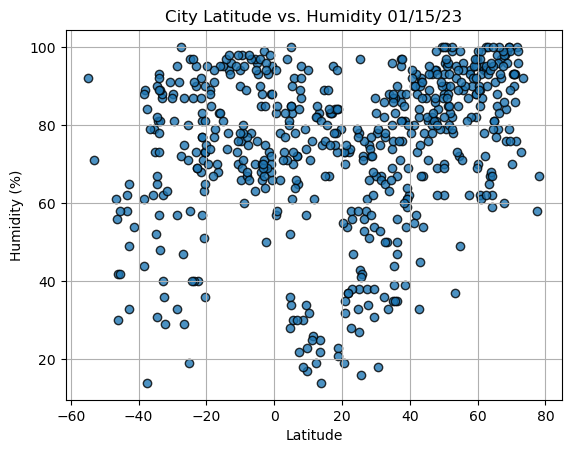

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

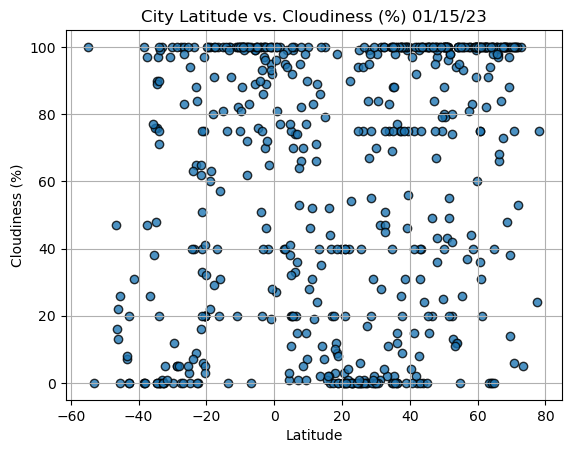

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

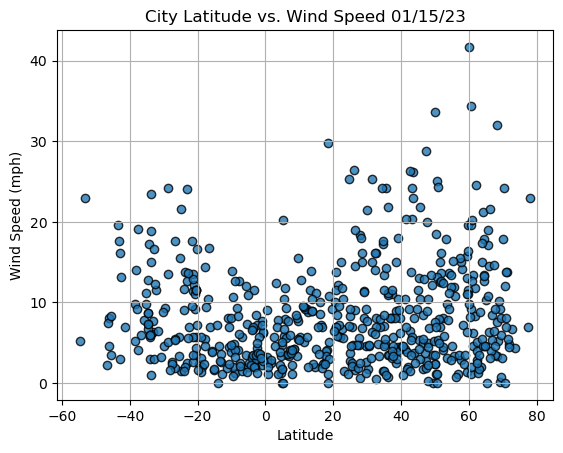

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [25]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
# Import linregress
    from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [21]:
index13 = city_data_df.loc[13]
index13

City                      Iqaluit
Country                        CA
Date          2023-01-16 03:13:46
Lat                       63.7506
Lng                      -68.5145
Max Temp                   -22.31
Humidity                       67
Cloudiness                    100
Wind Speed                   1.99
Name: 13, dtype: object

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

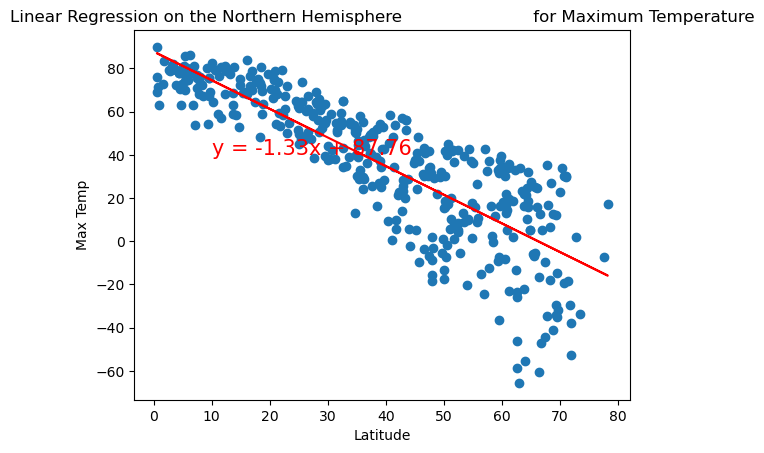

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
from scipy.stats import linregress

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

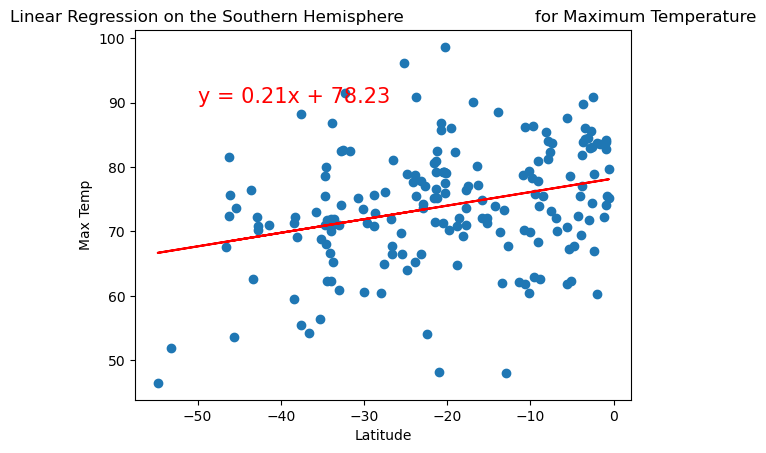

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))


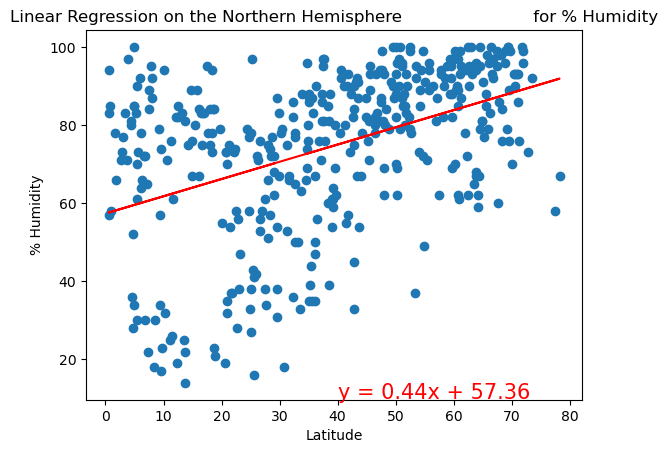

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))


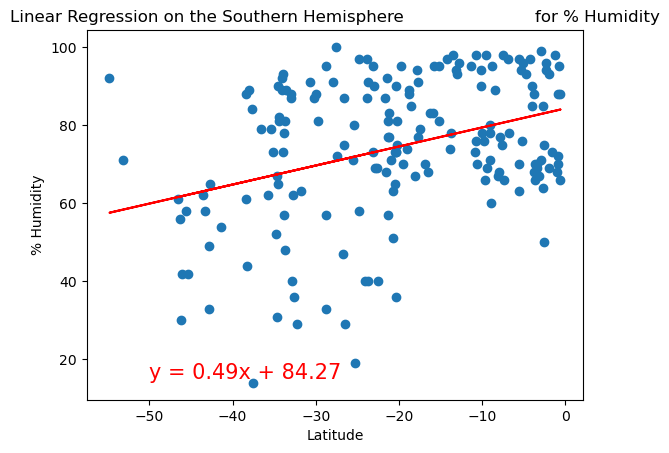

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))


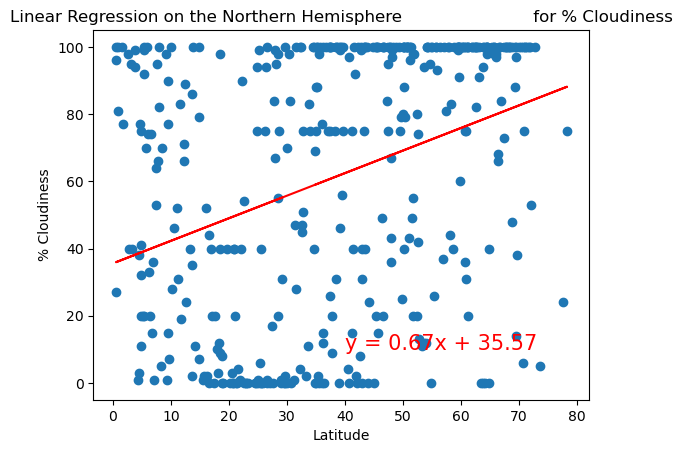

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))


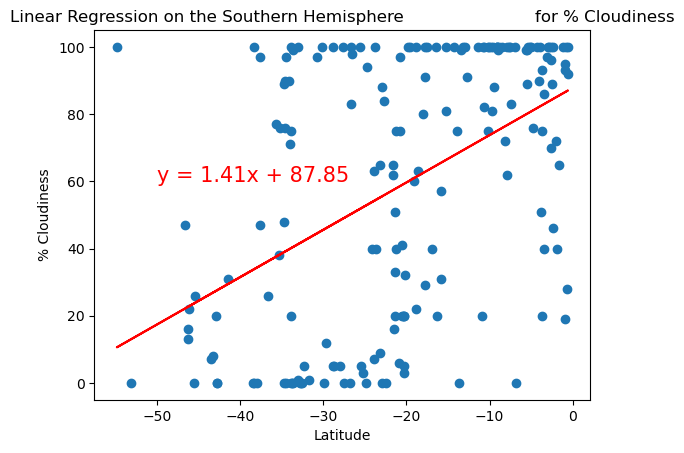

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))


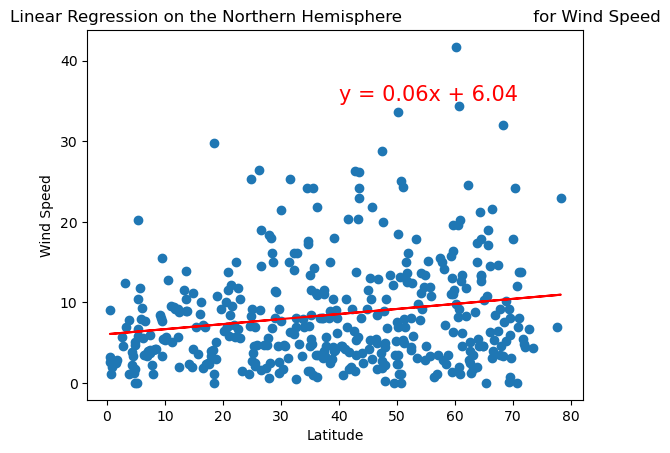

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))


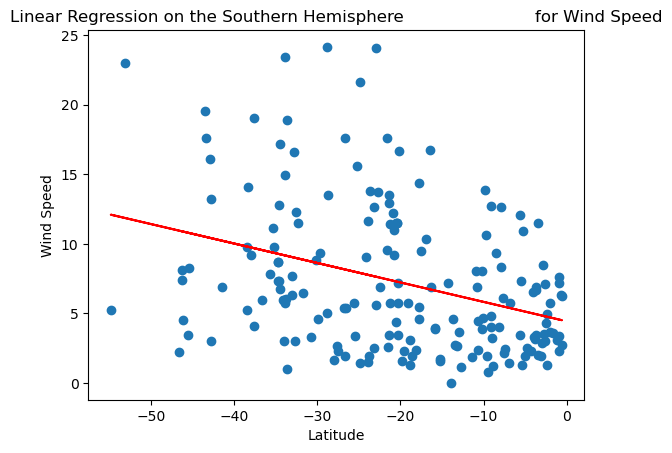

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))
